# Méthodes de gradient pour l'optimisation sans contraintes

Dans ce TP, on cherche à tester les différentes méthodes de gradient : 
- pas fixe ;
- pas optimal ;
- avec recherche linéaire de Wolfe
    * par bisection de l'intervalle, 
    * voire par interpolation cubique.

## Préliminaires

Commençons par importer quelques bibliothèques bien utiles !

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

Construisons maintenant une première fonction test $f_1$ définie par 
$$f_1(x,y) = \frac{1}{2} (x^2+7y^2).$$

In [163]:
def f1(X):
    (x0, x1) = X  # This is called a "destructuring assignment"
    return (x0**2+7*x1**2)/2
    
f1([1, 2])

14.5

Définissons maintenant une fonction qui retourne le gradient de $f_1$ en $(x,y)$.

In [164]:
def g1(X):
    (x0, x1) = X
    dx0 = x0
    dx1 = 7*x1
    return np.array((dx0, dx1))

g1([3, 3])

array([ 3, 21])

On termine ces préliminaires en écrivant une fonction qui permet de tracer les contours d'une fonction $f : \mathbb{R}^2 \to \mathbb{R}$ sur un pavé $[a,b] \times [c,d]$.

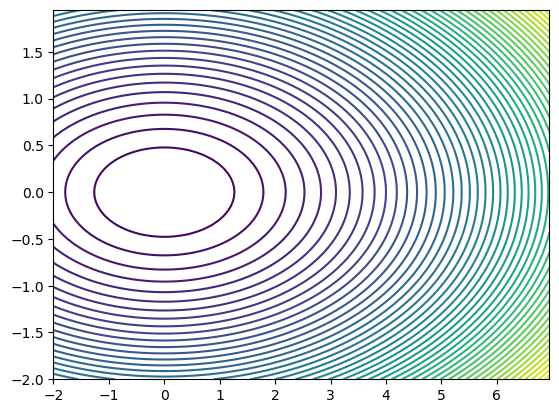

In [165]:
def plot_contour(a, b, c, d, f):
    delta = 0.05
    x0, x1 = np.meshgrid(np.arange(a, b, delta), np.arange(c, d, delta)) #fct permettant de tracer les graphe de niveau
    plt.contour(x0, x1, f((x0, x1)), 50) #trace les contour
    
 

plt.figure()
plot_contour(-2, 7, -2, 2, f1)

## Gradient à pas fixe et nombre d'itérations imposé

Ecrire une fonction qui effectue un nombre fixé d'itérations de la méthode de gradient à pas fixe.

In [166]:
def ppd_pas_fixe(f, g, X0, pas, IterMax):
    # f est la fonction qui évalue le critère pour en un point X donné
    # g est la fonction qui évalue le gradient du critère pour en un point X donné
    # X0 est le point de départ de l'algorithme
    # pas est la pas fixe
    # IterMax est le nombre d'itérations réalisées
        
    X      = X0.copy()
    iteres = np.zeros(shape=(IterMax+1, len(X))) # pour stocker les itérés
    steps  = np.zeros(shape=(IterMax,)) # pour stocker les pas successifs
    
    iteres[0] = X
    for i in range(IterMax):  #on fait une boucle pour chaque ittération

        # Calcul de la direction de descente
        d_k = -g(X)
        # Calcul de l'itéré suivant
        X=X + pas*d_k
        # Stockage du pas
        steps[i] = pas

        # Stockage du nouvel itéré
        iteres[i+1] = X

    return iteres, IterMax, steps # on affiche les le nombre de pas fait (step) , les valaur des itérés (iteres),le max d'iteration (itermax)

Tester la méthode de gradient à pas fixe pour chercher le point de minimum de $f_1$ en partant du point $(7,1.5)$, en faisant 50 itérations et avec un pas égal à $0.05$.

In [167]:
print( ppd_pas_fixe(f1, g1, [7,1.5], 0.05, 50))

(array([[7.00000000e+00, 1.50000000e+00],
       [6.65000000e+00, 9.75000000e-01],
       [6.31750000e+00, 6.33750000e-01],
       [6.00162500e+00, 4.11937500e-01],
       [5.70154375e+00, 2.67759375e-01],
       [5.41646656e+00, 1.74043594e-01],
       [5.14564323e+00, 1.13128336e-01],
       [4.88836107e+00, 7.35334184e-02],
       [4.64394302e+00, 4.77967219e-02],
       [4.41174587e+00, 3.10678693e-02],
       [4.19115857e+00, 2.01941150e-02],
       [3.98160065e+00, 1.31261748e-02],
       [3.78252061e+00, 8.53201359e-03],
       [3.59339458e+00, 5.54580884e-03],
       [3.41372485e+00, 3.60477574e-03],
       [3.24303861e+00, 2.34310423e-03],
       [3.08088668e+00, 1.52301775e-03],
       [2.92684235e+00, 9.89961539e-04],
       [2.78050023e+00, 6.43475000e-04],
       [2.64147522e+00, 4.18258750e-04],
       [2.50940146e+00, 2.71868188e-04],
       [2.38393138e+00, 1.76714322e-04],
       [2.26473481e+00, 1.14864309e-04],
       [2.15149807e+00, 7.46618010e-05],
       [2.04392

Essayons de visualiser la progression des itérés en les superposant aux courbes de niveau de la fonction $f$ à minimiser.

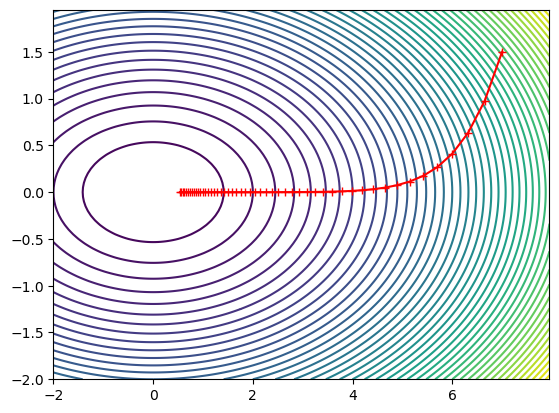

In [168]:
def plot_iteres(iteres, couleur):
    plt.plot(iteres[:,0], iteres[:,1], color=couleur, marker="+", linestyle="-")
    

plt.figure()
plot_contour(-2, 8, -2, 2, f1)
iteres,IterMax, steps = ppd_pas_fixe(f1, g1, [7,1.5], 0.05, 50)
plot_iteres(iteres,'r')

Etudier l'influence du pas fixe choisi en le faisant varier dans $[0.3, 0.25, 0.125, 0.05, 0.01]$.
A nombre d'itérations fixé et en partant du même point de départ, on comparera les derniers itérés obtenus dans chaque cas.

In [169]:
print( ppd_pas_fixe(f1, g1, [7,1.5], 0.3, 50)[0][-1])
print( ppd_pas_fixe(f1, g1, [7,1.5], 0.25, 50)[0][-1])
print( ppd_pas_fixe(f1, g1, [7,1.5], 0.125, 50)[0][-1])
print( ppd_pas_fixe(f1, g1, [7,1.5], 0.05, 50)[0][-1])
print( ppd_pas_fixe(f1, g1, [7,1.5], 0.01, 50)[0][-1])

[1.25892553e-07 1.76086279e+02]
[3.96425159e-06 8.49482485e-07]
[8.82065206e-03 1.05097385e-45]
[5.38614827e-01 6.63374986e-10]
[4.23504247 0.0398326 ]


## Gradient à pas fixe

Construire une fonction qui évalue le critère d'arrêt suivant pour une tolérance eps fixée : 
$$
\|\nabla f(X_k)\| < eps \text{ ou nombre d'itérations >= IterMax}.
$$

In [170]:
def arrêt(X,g,eps,k,IterMax):
    return(np.linalg.norm(g(X))< eps or k >= IterMax) # c'est la condition qui return True si la condition est verifier ou False si c'est pas vérifier
   
        
        
  
        
    

Construire une nouvelle fonction qui met en oeuvre la méthode de gradient à pas fixe, mais cette fois jusqu'à ce que le critère d'arrêt codé ci-dessus soit satisfait.

In [171]:
def ppd_pas_fixe_2(f, g, X0, pas, IterMax, eps):
    # f est la fonction qui évalue le critère pour en un point X donné
    # g est la fonction qui évalue le gradient du critère pour en un point X donné
    # X0 est le point de départ de l'algorithme
    # pas est la pas fixe
    # IterMax est le nombre d'itérations réalisées
    # eps est une tolérance fixée pour le critère d'arrêt
        
    X      = X0.copy()
    iteres = np.zeros(shape=(IterMax+1, len(X))) # pour stocker les itérés
    steps  = np.zeros(shape=(IterMax,)) # pour stocker les pas successifs
    iteres[0]=X
    k = 0
    while arrêt(X,g,eps,k,IterMax)== False: # Tant que la condition est pas vérifié on fait tourner la boucle

        # Calcul de la direction de descente
        d_k = -g(X)
        # Calcul de l'itéré suivant
        X=X + pas*d_k
        # Stockage du pas
        steps[k] = pas

        # Stockage du nouvel itéré
        iteres[k+1] = X
        
        k = k+1
        # Mise à jour du critère d'arrêt
        

    return iteres[:k+1,:], k, steps[:k]

Refaire l'évaluation de l'influence du choix du pas fixe, mais cette fois-ci avec IterMax = 300 itérations et en choisissant une tolérance $eps = 10^{-5}$.

In [172]:
print( ppd_pas_fixe_2(f1, g1, [7,1.5], 0.3,300,10**-5)[0][-1])
print( ppd_pas_fixe_2(f1, g1, [7,1.5], 0.25,300,10**-5)[0][-1])
print( ppd_pas_fixe_2(f1, g1, [7,1.5], 0.125,300,10**-5)[0][-1])
print( ppd_pas_fixe_2(f1, g1, [7,1.5], 0.05,300,10**-5)[0][-1])
print( ppd_pas_fixe_2(f1, g1, [7,1.5], 0.01,300,10**-5)[0][-1])

[2.36869991e-46 3.92551649e+12]
[ 5.28566879e-06 -1.13264331e-06]
[9.72548784e-06 9.20455025e-92]
[9.69183989e-06 9.38218638e-50]
[3.43286258e-01 5.25987987e-10]


## Gradient avec recherche linéaire d'Armijo

Programmer une fonction qui réalise la recherche linéaire d'Armijo : on part du pas $s_0 = 1$ et on le divise par $2$ tant que la condition d'Armijo suivante n'est pas satisfaite :
$$f(x + s d) \leq f(x) + \varepsilon_1 s  d^T \nabla f(x).$$

In [173]:
def res_armijo(f,g,X,S0,d,eps):
    s=S0
    while f(X+s*d)>f(X)+ eps*s*np.dot(np.transpose(d),g(X)): # C'est la condition à satisfaire
        s=s/2      # Cours ( si condition d'armijo pas satisfait on divise le pas par 2)
    return(s)

print(res_armijo(f1, g1, [7,1.5],1,-g1([7,1.5]),10**-5))

0.25


Ecrire une fonction qui met en oeuvre la méthode de gradient avec recherche linéaire d'Armijo.

In [174]:
def armijo(f,g,X0,IterMax,eps,S0):
     # f est la fonction qui évalue le critère pour en un point X donné
    # g est la fonction qui évalue le gradient du critère pour en un point X donné
    # X0 est le point de départ de l'algorithme
    # pas est la pas fixe
    # IterMax est le nombre d'itérations réalisées
    # eps est une tolérance fixée pour le critère d'arrêt
        
    X      = X0.copy()
    iteres = np.zeros(shape=(IterMax+1, len(X))) # pour stocker les itérés
    steps  = np.zeros(shape=(IterMax,)) # pour stocker les pas successifs
    iteres[0]=X
    k = 0
    
    while arrêt(X,g,eps,k,IterMax)== False:
        # Calcul de la direction de descente
        d_k = -g(X)
        #pas d'armijo
        pas = res_armijo(f,g,X,S0,d_k,eps)
        # Calcul de l'itéré suivant
        X=X + pas*d_k
        # Stockage du pas
        steps[k] = pas 

        # Stockage du nouvel itéré
        iteres[k+1] = X
        
        k = k+1      # pour faire tourner la boucle while
        # Mise à jour du critère d'arrêt
        

    return iteres[:k+1,:], k, steps[:k]


Tester la méthode de gradient avec recherche linéaire d'Armijo pour chercher le point de minimum de $f_1$ en partant du point $(7,1.5)$, avec IterMax = 300 itérations et en choisissant une tolérance $eps = 10^{-5}$.

In [175]:
print(armijo(f1,g1,[7,1.5],100,10**-5,1))

(array([[ 7.00000000e+00,  1.50000000e+00],
       [ 5.25000000e+00, -1.12500000e+00],
       [ 3.93750000e+00,  8.43750000e-01],
       [ 2.95312500e+00, -6.32812500e-01],
       [ 2.21484375e+00,  4.74609375e-01],
       [ 1.66113281e+00, -3.55957031e-01],
       [ 1.24584961e+00,  2.66967773e-01],
       [ 9.34387207e-01, -2.00225830e-01],
       [ 7.00790405e-01,  1.50169373e-01],
       [ 5.25592804e-01, -1.12627029e-01],
       [ 3.94194603e-01,  8.44702721e-02],
       [ 2.95645952e-01, -6.33527040e-02],
       [ 2.21734464e-01,  4.75145280e-02],
       [ 1.66300848e-01, -3.56358960e-02],
       [ 1.24725636e-01,  2.67269220e-02],
       [ 9.35442271e-02, -2.00451915e-02],
       [ 7.01581703e-02,  1.50338936e-02],
       [ 5.26186277e-02, -1.12754202e-02],
       [ 3.94639708e-02,  8.45656517e-03],
       [ 2.95979781e-02, -6.34242388e-03],
       [ 2.21984836e-02,  4.75681791e-03],
       [ 1.66488627e-02, -3.56761343e-03],
       [ 1.24866470e-02,  2.67571007e-03],
       [ 9

## Gradient avec recherche linéaire de Wolfe

Programmer une fonction qui réalise la recherche linéaire de Wolfe _à la Fletcher et Lemaréchal_.

In [176]:
def RL_WOLFE(X, d, f, g, s0 = 1.0, eps1 = 0.01, eps2 = 0.99):
    # X est l'itéré courant x_k
    # d est la direction de recherche
    # f est la fonction qui évalue le critère pour en un point X donné
    # g est la fonction qui évalue le gradient du critère pour en un point X donné
    # s_0 est la longueur de pas initiale
    # eps1 et eps2 sont les paramètres utilisés dans les conditions de Wolfe
  
    s = s0
    k = 0
    sg = 0.0
    sd = 1000.0
    
    while f(X+s*d)>f(X)+ eps1*s*np.dot(g(X),d) or np.dot(g(X+s*d),d) < eps2*np.dot(g(X),d): # C'est le cours on fait exactement comme en haut en changeant juste les conditions 
        if f(X+s*d)>f(X)+ eps1*s*np.dot(g(X),d):
            sd=s
            s=(sg+sd)/2
        elif np.dot(g(X+s*d),d) < eps2*np.dot(g(X),d):
            sg=s
            s=(sg+sd)/2
        k=k+1   # pour faire tourner la boucle while
                
    return s

print(RL_WOLFE([7,1.5], -g1([7,1.5]), f1, g1, s0 = 1.0, eps1 = 0.01, eps2 = 0.99))

0.25


Ecrire une fonction qui met en oeuvre la méthode de gradient avec recherche linéaire de Wolfe.

In [177]:
def ppd_RL_Wolfe(f, g, X0, IterMax, eps):
    # f est la fonction qui évalue le critère pour en un point X donné
    # g est la fonction qui évalue le gradient du critère pour en un point X donné
    # X0 est le point de départ de l'algorithme
    # IterMax est le nombre d'itérations réalisées
    # eps est une tolérance fixée pour le critère d'arrêt
        
    X      = X0.copy()
    iteres = np.zeros(shape=(IterMax+1, len(X))) # pour stocker les itérés
    steps  = np.zeros(shape=(IterMax,)) # pour stocker les pas successifs
    iteres[0]=X
    k = 0

    while arrêt(X,g,eps,k,IterMax)== False:
        # Calcul de la direction de descente
        d_k = -g(X)
        # Pas de Wolfe
        pas = RL_WOLFE(X, d_k, f, g, s0 = 1.0, eps1 = 0.01, eps2 = 0.99)
        # Calcul de l'itéré suivant
        X=X + pas*d_k
        # Stockage du pas
        steps[k] = pas 

        # Stockage du nouvel itéré
        iteres[k+1] = X
        
        k = k+1
        # Mise à jour du critère d'arrêt
        

    return iteres[:k+1,:], k, steps[:k]


Tester la méthode de gradient avec recherche linéaire de Wolfe pour chercher le point de minimum de $f_1$ en partant du point $(7,1.5)$, avec IterMax = 300 itérations et en choisissant une tolérance $eps = 10^{-5}$.

In [178]:
print(ppd_RL_Wolfe(f1, g1, [7,1.5], 300, 10*-5))

(array([[ 7.00000000e+00,  1.50000000e+00],
       [ 5.25000000e+00, -1.12500000e+00],
       [ 3.93750000e+00,  8.43750000e-01],
       [ 2.95312500e+00, -6.32812500e-01],
       [ 2.21484375e+00,  4.74609375e-01],
       [ 1.66113281e+00, -3.55957031e-01],
       [ 1.24584961e+00,  2.66967773e-01],
       [ 9.34387207e-01, -2.00225830e-01],
       [ 7.00790405e-01,  1.50169373e-01],
       [ 5.25592804e-01, -1.12627029e-01],
       [ 3.94194603e-01,  8.44702721e-02],
       [ 2.95645952e-01, -6.33527040e-02],
       [ 2.21734464e-01,  4.75145280e-02],
       [ 1.66300848e-01, -3.56358960e-02],
       [ 1.24725636e-01,  2.67269220e-02],
       [ 9.35442271e-02, -2.00451915e-02],
       [ 7.01581703e-02,  1.50338936e-02],
       [ 5.26186277e-02, -1.12754202e-02],
       [ 3.94639708e-02,  8.45656517e-03],
       [ 2.95979781e-02, -6.34242388e-03],
       [ 2.21984836e-02,  4.75681791e-03],
       [ 1.66488627e-02, -3.56761343e-03],
       [ 1.24866470e-02,  2.67571007e-03],
       [ 9

## Gradient pas optimal

Construire une fonction qui calcule le pas optimal dans la méthode de gradient pour la fonction $f_1$.

In [179]:
def pas_opti_f1(X,d):
    return((-X[0]*d[0]-7*X[1]*d[1])/((d[0]**2)+(7*d[1]**2))) # On calcule le gradient à la main
    

Ecrire une fonction qui met en oeuvre la méthode de gradient avec pas optimal.

In [180]:
def ppd_pas_optimal(f, g, X0, pas_optimal_f, IterMax, eps):
    # f est la fonction qui évalue le critère pour en un point X donné
    # g est la fonction qui évalue le gradient du critère pour en un point X donné
    # X0 est le point de départ de l'algorithme
    # pas_optimal_f est une fonction qui retourne le pas optimal dans la méthode de gradient pour la fonction f
    # IterMax est le nombre d'itérations réalisées
    # eps est une tolérance fixée pour le critère d'arrêt
        
    X = X0.copy()
    iteres = np.zeros(shape=(IterMax+1, len(X))) # pour stocker les itérés
    steps  = np.zeros(shape=(IterMax,)) # pour stocker les pas successifs
    iteres[0]=X
    k = 0
    
    while arrêt(X,g,eps,k,IterMax)== False:
        # Calcul de la direction de descente
        d_k = -g(X)
        #Calcul du pas optimal
        pas = pas_optimal_f(X,d_k)
        # Calcul de l'itéré suivant
        X=X + pas*d_k
        # Stockage du pas
        steps[k] = pas 

        # Stockage du nouvel itéré
        iteres[k+1] = X
        
        k = k+1
        # Mise à jour du critère d'arrêt
        

    return iteres[:k+1,:], k, steps[:k]


Tester la méthode de gradient avec pas optimal pour chercher le point de minimum de $f_1$ en partant du point $(7,1.5)$, avec IterMax = 300 itérations et en choisissant une tolérance $eps = 10^{-5}$.

In [181]:
print(ppd_pas_optimal(f1, g1,[7,1.5], pas_opti_f1, 300, 10**-5))

(array([[ 7.00000000e+00,  1.50000000e+00],
       [ 5.64179104e+00, -5.37313433e-01],
       [ 3.65954014e+00,  7.84187172e-01],
       [ 2.94948011e+00, -2.80902868e-01],
       [ 1.91317629e+00,  4.09966347e-01],
       [ 1.54196298e+00, -1.46853617e-01],
       [ 1.00019220e+00,  2.14326900e-01],
       [ 8.06125058e-01, -7.67738151e-02],
       [ 5.22891930e-01,  1.12048271e-01],
       [ 4.21435287e-01, -4.01366940e-02],
       [ 2.73363429e-01,  5.85778777e-02],
       [ 2.20322764e-01, -2.09831204e-02],
       [ 1.42912063e-01,  3.06240135e-02],
       [ 1.15182857e-01, -1.09697959e-02],
       [ 7.47132044e-02,  1.60099724e-02],
       [ 6.02166125e-02, -5.73491548e-03],
       [ 3.90594243e-02,  8.36987664e-03],
       [ 3.14807301e-02, -2.99816477e-03],
       [ 2.04199330e-02,  4.37569993e-03],
       [ 1.64578565e-02, -1.56741490e-03],
       [ 1.06753663e-02,  2.28757850e-03],
       [ 8.60402661e-03, -8.19431106e-04],
       [ 5.58099023e-03,  1.19592648e-03],
       [ 4

## Comparaison globale

Représenter sur un même graphique
* les courbes de niveau de la fonction $f_1$,
* en vert les itérés de la méthode à pas fixe (avec le meilleur pas identifé ci-dessus),
* en bleu les itérés de la méthode à pas optimal, 
* en rose les itérés de la méthode avec recherche linéaire d'Armijo,
* en rouge les itérés de la methode avec recherche linéaire de Wolfe.

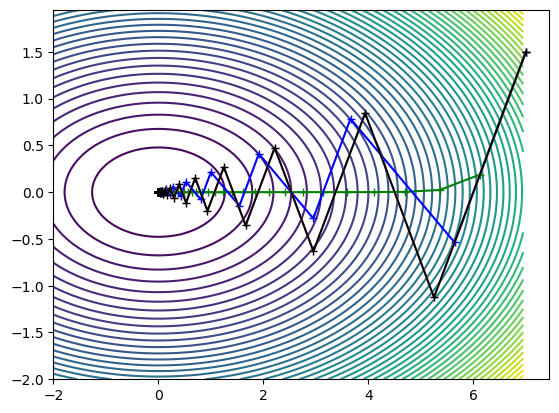

In [219]:
plot_contour(-2,7,-2,2,f1)    # On compare juste les différent méthode entre elles

iteres = ppd_pas_fixe_2(f1,g1,[7,1.5],0.125,300,10**-5)[0]
plot_iteres(iteres,'g')

iteres = ppd_pas_optimal(f1,g1,[7,1.5],pas_opti_f1,300,10**-5)[0]
plot_iteres(iteres,'b')

iteres = armijo(f1,g1,[7,1.5],300,10**-5,1)[0]
plot_iteres(iteres,'pink')

iteres = ppd_RL_Wolfe(f1,g1,[7,1.5],300,10**-5)[0]
plot_iteres(iteres,'black')


Représenter sur un même graphique l'évolution en échelle logarithmique de la valeur de $f_1$ en fonction des itérations
* en vert pour la méthode à pas fixe (avec le meilleur pas identifé ci-dessus),
* en bleu pour la méthode à pas optimal, 
* en rose pour la méthode avec recherche linéaire d'Armijo,
* en rouge pour la methode avec recherche linéaire de Wolfe.

Représenter sur un même graphique l'évolution des pas en fonction des itérations
* en vert pour la méthode à pas fixe (avec le meilleur pas identifé ci-dessus),
* en bleu pour la méthode à pas optimal, 
* en rose pour de la méthode avec recherche linéaire d'Armijo,
* en rouge pour la methode avec recherche linéaire de Wolfe.